In [1]:
url = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_a.csv"
urlb = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_b.csv"

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# Midterm Final Notebook
## Credit Card Fraud Detection
### Abe Eyman Casey

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
import statistics as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [3]:
df = pd.read_csv(url)
df_b = pd.read_csv(urlb)
df_full = df.append(pd.DataFrame(data = df_b), ignore_index=True)

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
284315+492

284807

In [6]:
df_full.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [7]:
df_full.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## EDA

## Modeling

In [8]:
y = df_full['Class']
x = df_full.drop(['Class'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .35, random_state = 13, stratify = y)
y_train.value_counts()
y_test.value_counts()
#Very highly unbalanced data so using stratify = y was essential to ensure the test data had enough fraud values to test our models on

0    184804
1       320
Name: Class, dtype: int64

0    99511
1      172
Name: Class, dtype: int64

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=13)


In [10]:
model = RandomForestClassifier(n_estimators=10, random_state = 13)

In [11]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=13)

In [12]:
%%time
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

CPU times: user 203 ms, sys: 0 ns, total: 203 ms
Wall time: 195 ms


In [13]:
#scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

### Training Evaluation

In [14]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp + fn)
false_pos = fp/(fp + tn)
false_neg = fn/(fn + tp)

In [15]:
print('Sensitivity (True Positive Detection): %.3f' % sensitivity) #probablity of correctly identifying positive case
print('Specificity (True Negative Detection): %.3f' % specificity) #probability of correctly identifying negative case
print('False Positive Rate: %.3f' % false_pos)
print('False Negative Rate: %.3f' % false_neg)

Sensitivity (True Positive Detection): 0.966
Specificity (True Negative Detection): 1.000
False Positive Rate: 0.000
False Negative Rate: 0.034


### Testing Evaluation

In [16]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp + fn)
false_pos = fp/(fp + tn)
false_neg = fn/(fn + tp)
undetected = fn/(fn+tp+fp+tn)

In [17]:
print('Sensitivity (True Positive Detection): %.3f' % sensitivity) #probablity of correctly identifying positive case
print('Specificity (True Negative Detection): %.3f' % specificity) #probability of correctly identifying negative case
print('False Positive Rate: %.3f' % false_pos)
print('False Negative Rate: %.3f' % false_neg)
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Sensitivity (True Positive Detection): 0.738
Specificity (True Negative Detection): 1.000
False Positive Rate: 0.000
False Negative Rate: 0.262
     pred_neg  pred_pos
neg     99505         6
pos        45       127
0.9994883781587632


### Hopefully want to reduce the number of false negatives (actually fraud but predicted not fraud)

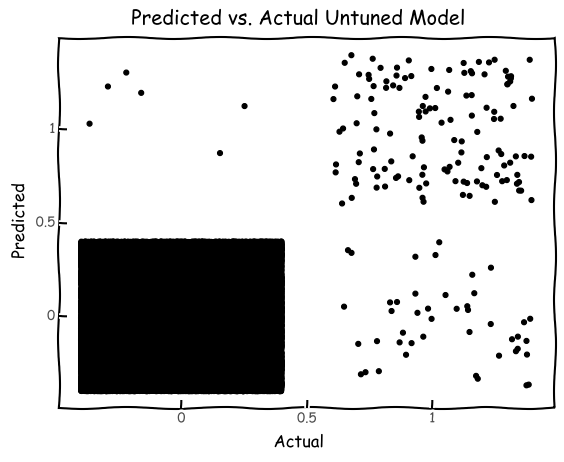

<ggplot: (8762891928570)>

In [18]:
df_lin = pd.DataFrame({'Actual': y_test, 
              'Predicted': y_pred})
(
ggplot() +
    geom_jitter(data = df_lin, mapping = aes(x = 'Actual', y = 'Predicted')) +
    theme_xkcd() +
    labs(title = "Predicted vs. Actual Untuned Model") 
)

In [19]:
rf = RandomForestClassifier()
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## Tuning
#### Goal: Minimize False Negative 
False Negative cases are much more harmful in Credit Card Fraud Detection than False Positives. Better safe than sorry.

In [20]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [21]:
brf = RandomForestClassifier(random_state = 13)

In [22]:
param_grid = {'n_estimators': [10, 20], 
             'bootstrap': [True, False],
             'class_weight': [None, 'balanced_subsample'],
             'max_features': ['auto', 'sqrt'],
             'max_depth' : [4, 8], 
             'criterion' :['gini', 'entropy']}

#### Specificity 

In [23]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state=13)

In [24]:
%%time
#grid_search_spec = GridSearchCV(brf, param_grid, return_train_score = False, n_jobs = -1, verbose=1)
#grid_search_spec.fit(x_train.values, y_train.values)
#y_pred_spec = grid_search_spec.predict(x_test.values)
import joblib as joblib
#joblib.dump(grid_search_spec.best_params_, '../data/grid_best_params.pkl')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


In [25]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=13)
spec_params = joblib.load('../data/grid_best_params.pkl')
model_spec = RandomForestClassifier(**spec_params, random_state = 13)
model_spec.fit(x_train, y_train)
y_pred_spec = model_spec.predict(x_test)
y_train_pred_spec = model_spec.predict(x_train)

RandomForestClassifier(bootstrap=False, max_depth=8, n_estimators=20,
                       random_state=13)

In [26]:
print('Best params in general')
print(spec_params)
print('\n Confusion matrix of Random Forest optimized {} on the test data:'.format('in general'))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_spec).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp + fn)
false_pos = fp/(fp + tn)
false_neg = fn/(fn + tp)
undetected = fn/(fn+tp+fp+tn)
print('False Negative Rate: %.3f' % false_neg) #probability of correctly identifying negative case
print('False Positive Rate: %.3f' % false_pos)
print(pd.DataFrame(confusion_matrix(y_test, y_pred_spec),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
print('Overall Acurracy: %.3f' % accuracy_score(y_test, y_pred_spec))
print('Total % of Fraud Cases Not Detected: {0:1.3f}%'.format(undetected*100))

Best params in general
{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 20}

 Confusion matrix of Random Forest optimized in general on the test data:
False Negative Rate: 0.256
False Positive Rate: 0.000
     pred_neg  pred_pos
neg     99501        10
pos        44       128
Overall Acurracy: 0.999
Total % of Fraud Cases Not Detected: 0.044%


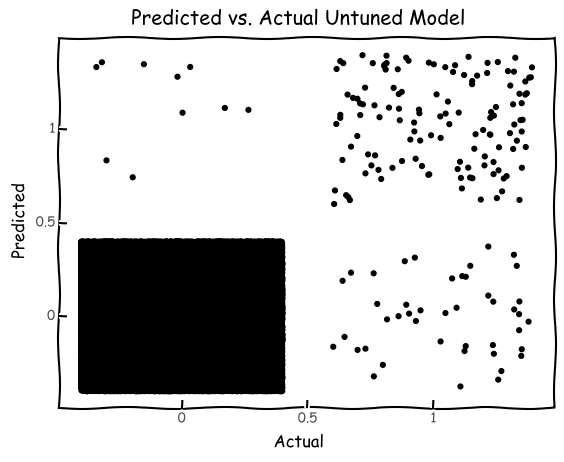

<ggplot: (8762887009187)>

In [27]:
df_lin = pd.DataFrame({'Actual': y_test, 
              'Predicted': y_pred_spec})
(
ggplot() +
    geom_jitter(data = df_lin, mapping = aes(x = 'Actual', y = 'Predicted')) +
    theme_xkcd() +
    labs(title = "Predicted vs. Actual Untuned Model") 
)

### Sensitivity vs Specificity tradeoff

In [28]:
class_weights = [1, 500, 1000, 10000, 20000, 50000, 100000, 125000, 150000, 200000, 300000, 500000]
random_seeds = [11, 13, 9]
df = pd.DataFrame(columns = ['weight_odds',
              'accuracy',
              'sensitivity',
              'specificity',
              'false_negative'])

In [29]:
for i in class_weights:
    if i == 'balanced':
        class_weight = i
    else:
        class_weight = {0:1, 1:i}
    custom_params = {'bootstrap': True,
     'class_weight': class_weight,
     'criterion': 'gini',
     'max_depth': 8,
     'max_features': 'auto',
     'n_estimators': 10}
    model_custom = RandomForestClassifier(**custom_params, random_state = 11)
    model_custom.fit(x_train, y_train)
    y_pred_custom = model_custom.predict(x_test)
    y_train_pred_custom = model_custom.predict(x_train)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
    false_neg = fn/(fn + tp)
    accuracy = accuracy_score(y_test, y_pred_custom)
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    df = df.append({'weight_odds': i,
                   'accuracy': accuracy,
                   'sensitivity': sensitivity,
                   'specificity': specificity,
                   'false_negative':false_neg}, ignore_index = True)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=8, n_estimators=10,
                       random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 500}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 1000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 10000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 20000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 50000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 100000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 125000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 150000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 200000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 300000}, max_depth=8,
                       n_estimators=10, random_state=11)

RandomForestClassifier(class_weight={0: 1, 1: 500000}, max_depth=8,
                       n_estimators=10, random_state=11)

In [30]:
df

,weight_odds,accuracy,sensitivity,specificity,false_negative
0,1.0,0.999428,0.720930,0.999910,0.279070
1,500.0,0.999298,0.755814,0.999719,0.244186
2,1000.0,0.997873,0.773256,0.998261,0.226744
3,10000.0,0.989507,0.819767,0.989800,0.180233
4,20000.0,0.972964,0.843023,0.973189,0.156977
5,50000.0,0.955780,0.872093,0.955924,0.127907
6,100000.0,0.882889,0.895349,0.882867,0.104651
7,125000.0,0.829048,0.906977,0.828913,0.093023
8,150000.0,0.813378,0.906977,0.813217,0.093023
9,200000.0,0.775589,0.906977,0.775362,0.093023


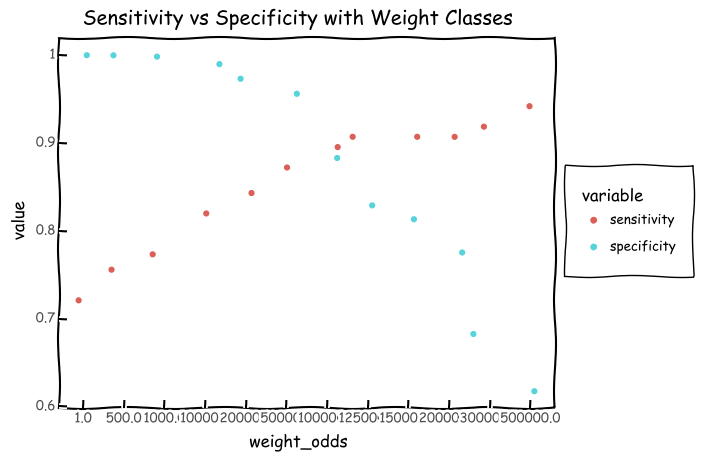

<ggplot: (8762879738513)>

In [31]:
plot_df = pd.melt(df, id_vars=["weight_odds"], value_vars = ['sensitivity', 'specificity', 'accuracy', 'false_negative'])
plot_df = (plot_df.
     query('variable == "sensitivity" | variable == "specificity"')   
)

plot_df['weight_odds'] = pd.Categorical(plot_df.weight_odds)

(
ggplot() +
    geom_jitter(data = plot_df, mapping = aes(x = 'weight_odds', y = 'value', color = 'variable')) +
    theme_xkcd() +
    labs(title = "Sensitivity vs Specificity with Weight Classes") 
)

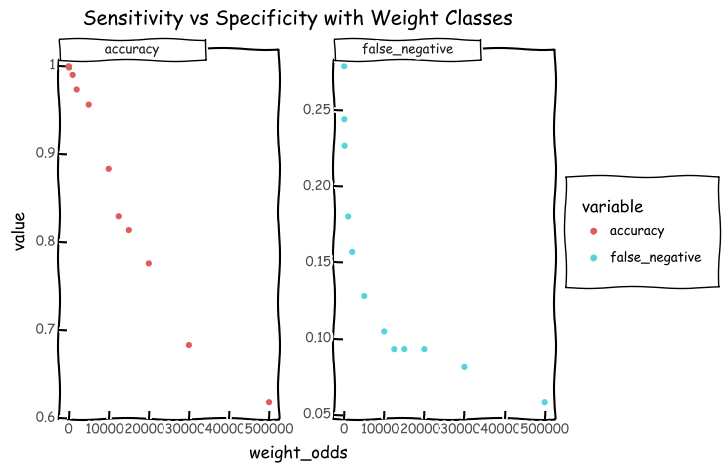

<ggplot: (8762937849435)>

In [32]:
plot_df = pd.melt(df, id_vars=["weight_odds"], value_vars = ['sensitivity', 'specificity', 'accuracy', 'false_negative'])
plot_df = (plot_df.
     query('variable == "accuracy" | variable == "false_negative"')   
)
(
ggplot() +
    geom_jitter(data = plot_df, mapping = aes(x = 'weight_odds', y = 'value', color = 'variable')) +
    theme_xkcd() +
    labs(title = "Sensitivity vs Specificity with Weight Classes") +
    facet_wrap('variable', scales = 'free_y') + 
    theme(subplots_adjust={'wspace': 0.25})
)

In [33]:
custom_params = {'bootstrap': True,
    'class_weight': {0:1, 1:100000},
    'criterion': 'gini',
    'max_depth': 8,
    'max_features': 'auto',
    'n_estimators': 10}
model_custom = RandomForestClassifier(**custom_params, random_state = 11)
model_custom.fit(x_train, y_train)
y_pred_custom = model_custom.predict(x_test)
y_train_pred_custom = model_custom.predict(x_train)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp + fn)
false_pos = fp/(fp + tn)
false_neg = fn/(fn + tp)
undetected = fn/(fn+tp+fp+tn) #probablity of correctly identifying positive case
print('False Negative Rate: %.3f' % false_neg) #probability of correctly identifying negative case
print('False Positive Rate: %.3f' % false_pos)
print(pd.DataFrame(confusion_matrix(y_test, y_pred_custom),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
print('Overall Acurracy: %.3f' % accuracy_score(y_test, y_pred_custom))
print('Total % of Fraud Cases Not Detected: {0:1.3f}%'.format(undetected*100))

RandomForestClassifier(class_weight={0: 1, 1: 100000}, max_depth=8,
                       n_estimators=10, random_state=11)

False Negative Rate: 0.105
False Positive Rate: 0.117
     pred_neg  pred_pos
neg     87855     11656
pos        18       154
Overall Acurracy: 0.883
Total % of Fraud Cases Not Detected: 0.018%


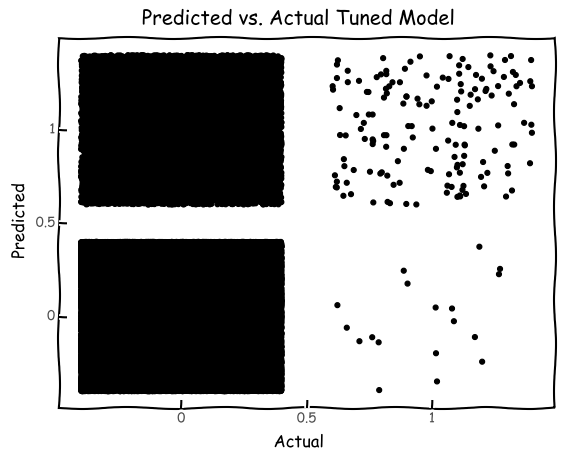

<ggplot: (8762937849829)>

In [34]:
df_lin = pd.DataFrame({'Actual': y_test, 
              'Predicted': y_pred_custom})
(
ggplot() +
    geom_jitter(data = df_lin, mapping = aes(x = 'Actual', y = 'Predicted')) +
    theme_xkcd() +
    labs(title = "Predicted vs. Actual Tuned Model") 
)